# Problem 2: CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
Insurance = pd.read_csv(r'C:\Users\vicky\Document\insurance_part2_data.csv')

In [3]:
Insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
Insurance.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [5]:
Insurance.shape

(3000, 10)

In [6]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


Observation

* There are 10 variables

* Age, Commision, Duration, Sales are numeric variable

* rest are categorial variables

* 3000 records, no missing record

* 9 independant variable and one target variable - Clamied

In [7]:
# Checking are there any missing values ?
Insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

Observation

* There are no missing value

In [8]:
# Checking Descriptive Statistics Summary

Insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


Observation

* Duration has negative value, it is not possible. Wrong entry.

* Commision & Sales- mean and median varies signficantly.

In [9]:
Insurance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Insurance.head(15)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [11]:
Insurance.tail(15)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2985,34,EPX,Travel Agency,Yes,0.00,Online,34,19.00,Cancellation Plan,ASIA
2986,36,EPX,Travel Agency,No,0.00,Online,154,147.00,Customised Plan,EUROPE
2987,16,C2B,Airlines,Yes,15.00,Online,15,60.00,Bronze Plan,ASIA
2988,36,EPX,Travel Agency,Yes,0.00,Online,18,36.00,Customised Plan,ASIA
2989,35,EPX,Travel Agency,No,0.00,Online,26,20.00,Customised Plan,ASIA
2990,51,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA


Observation

* Data looks good at first glance

In [12]:
# Checking are there any duplicates ?
dups = Insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Insurance[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Observation

From above it shows there are 139 records, but it can be of different customers, and there is no customer ID or any unique identifier, so I am not dropping them off.

# Univariate Analysis

# Age

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age'}, xlabel='Age'>

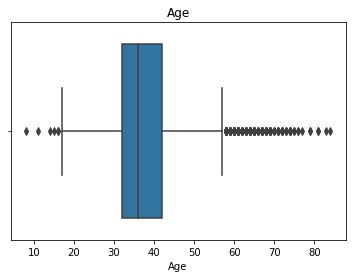

In [13]:
# Box Plot to checking presence of outliers in each feature
plt.title('Age')
sns.boxplot(Insurance['Age'],orient='horizondal')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


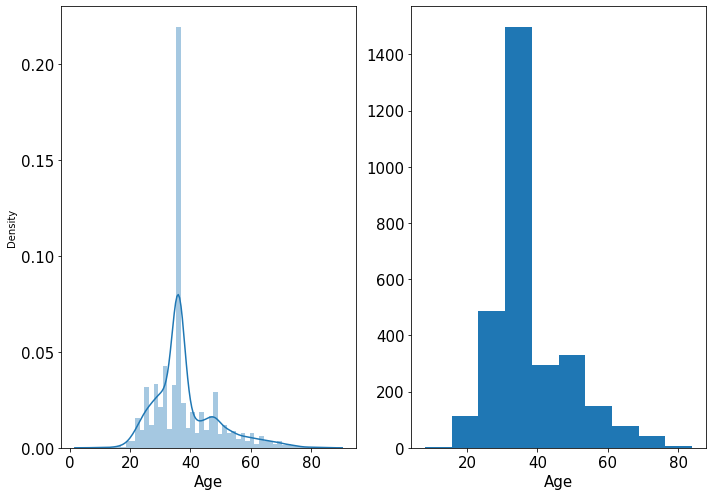

In [14]:
fig, (a1,a2)=plt.subplots(1,2,figsize=(10,7))

#distplot
sns.distplot(Insurance['Age'],ax=a1)
a1.set_xlabel('Age', fontsize=15)
a1.tick_params(labelsize=15)

#histogram
a2.hist(Insurance['Age'])
a2.set_xlabel('Age', fontsize=15)
a2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Commision

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Commision'}, xlabel='Commision'>

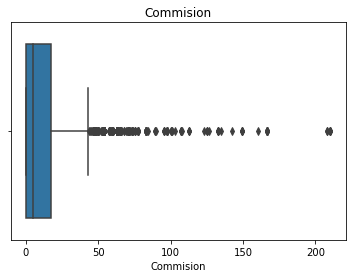

In [15]:
# Box Plot to checking presence of outliers in each feature
plt.title('Commision')
sns.boxplot(Insurance['Commision'],orient='horizondal')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


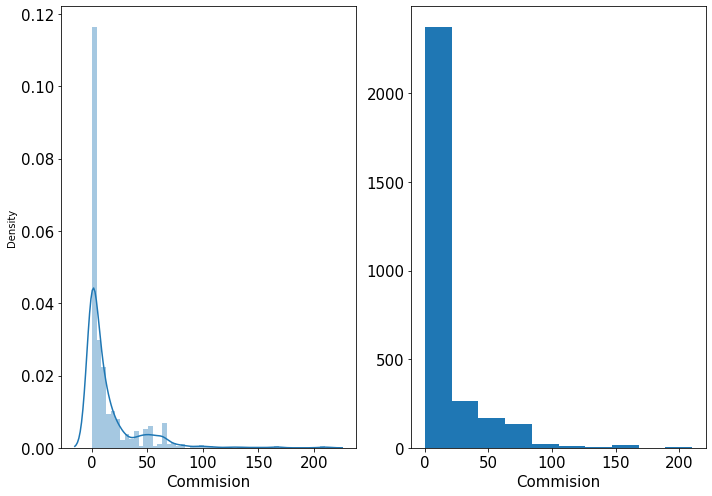

In [16]:
fig, (a1,a2)=plt.subplots(1,2,figsize=(10,7))

#distplot
sns.distplot(Insurance['Commision'],ax=a1)
a1.set_xlabel('Commision', fontsize=15)
a1.tick_params(labelsize=15)

#histogram
a2.hist(Insurance['Commision'])
a2.set_xlabel('Commision', fontsize=15)
a2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Duration

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Duration'}, xlabel='Duration'>

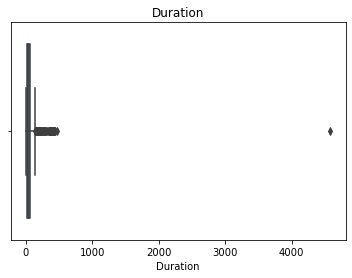

In [17]:
# Box Plot to checking presence of outliers in each feature
plt.title('Duration')
sns.boxplot(Insurance['Duration'],orient='horizondal')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


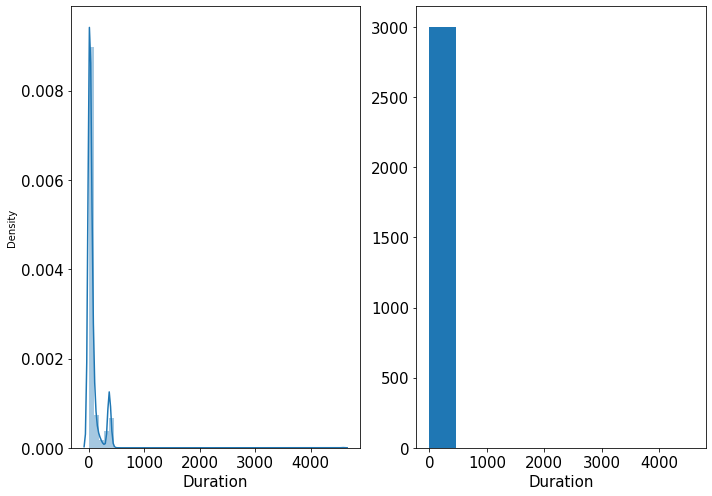

In [18]:
fig, (a1,a2)=plt.subplots(1,2,figsize=(10,7))

#distplot
sns.distplot(Insurance['Duration'],ax=a1)
a1.set_xlabel('Duration', fontsize=15)
a1.tick_params(labelsize=15)

#histogram
a2.hist(Insurance['Duration'])
a2.set_xlabel('Duration', fontsize=15)
a2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Sales

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Sales'}, xlabel='Sales'>

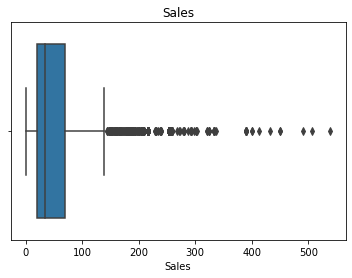

In [19]:
# Box Plot to checking presence of outliers in each feature
plt.title('Sales')
sns.boxplot(Insurance['Sales'],orient='horizondal')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


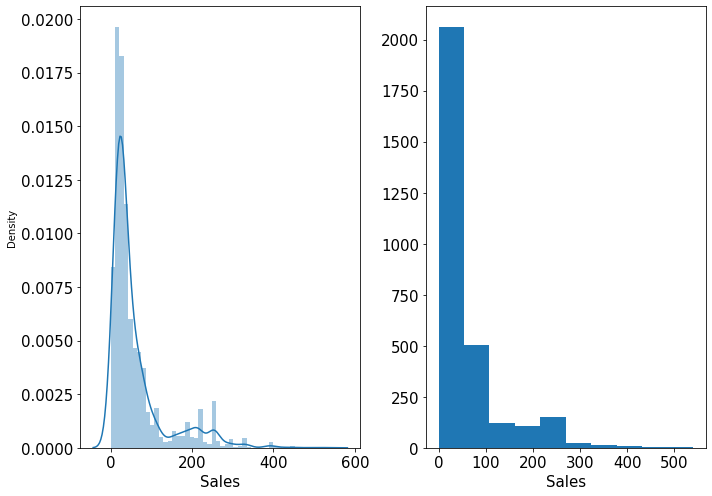

In [20]:
fig, (a1,a2)=plt.subplots(1,2,figsize=(10,7))

#distplot
sns.distplot(Insurance['Sales'],ax=a1)
a1.set_xlabel('Sales', fontsize=15)
a1.tick_params(labelsize=15)

#histogram
a2.hist(Insurance['Sales'])
a2.set_xlabel('Sales', fontsize=15)
a2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is. There are outliers in all the variables, but the sales and commision can be a geneui business value.

I will treat the outliers for the ANN model to compare the same after the all the steps just for comparsion.

# Categorical Variables

# Agency_Code

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

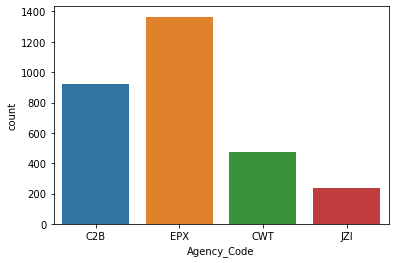

In [22]:
# Plot the Count plot 

sns.countplot(data = Insurance, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

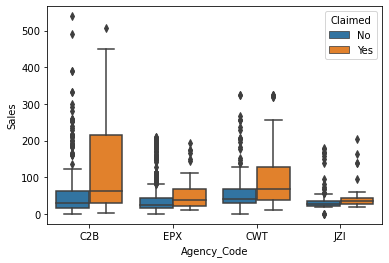

In [23]:
# Box Plot to checking presence of outliers in each feature

sns.boxplot(data = Insurance, x='Agency_Code',y='Sales', hue='Claimed')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

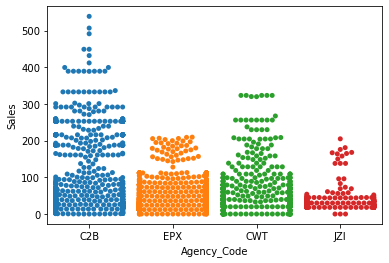

In [24]:
# Plot the Swarm plot

sns.swarmplot(data = Insurance, x='Agency_Code',y='Sales')

# Type

<AxesSubplot:xlabel='Type', ylabel='count'>

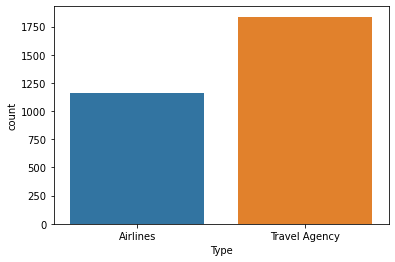

In [25]:
# Plot the Count plot 

sns.countplot(data = Insurance, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

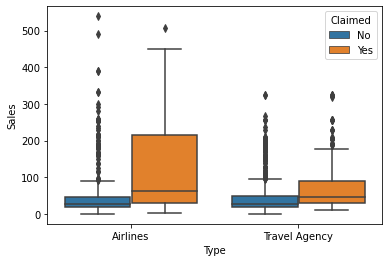

In [26]:
# Box Plot to checking presence of outliers in each feature

sns.boxplot(data = Insurance, x='Type',y='Sales', hue='Claimed')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type', ylabel='Sales'>

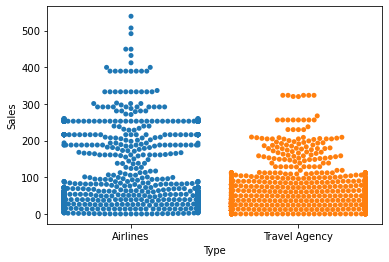

In [27]:
# Plot the Swarm plot

sns.swarmplot(data = Insurance, x='Type',y='Sales')

# Channel

<AxesSubplot:xlabel='Channel', ylabel='count'>

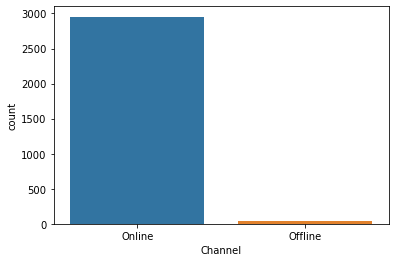

In [28]:
# Plot the Count plot 

sns.countplot(data = Insurance, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

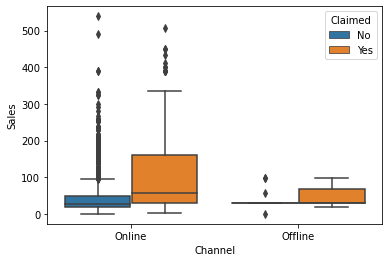

In [29]:
# Box Plot to checking presence of outliers in each feature

sns.boxplot(data = Insurance, x='Channel',y='Sales', hue='Claimed')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Channel', ylabel='Sales'>

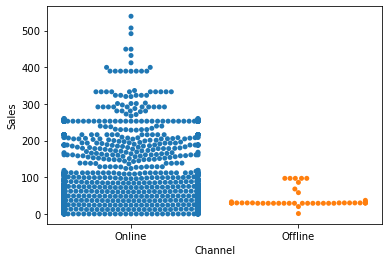

In [30]:
# Plot the Swarm plot

sns.swarmplot(data = Insurance, x='Channel',y='Sales')

# Product Name

<AxesSubplot:xlabel='Product Name', ylabel='count'>

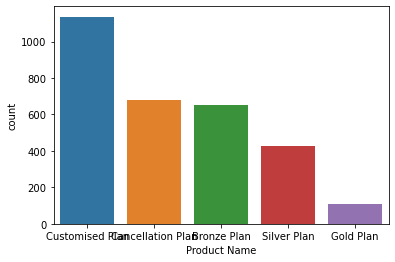

In [31]:
# Plot the Count plot 

sns.countplot(data = Insurance, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

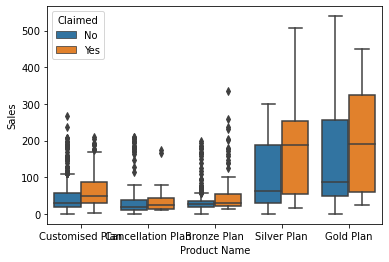

In [32]:
# Box Plot to checking presence of outliers in each feature

sns.boxplot(data = Insurance, x='Product Name',y='Sales', hue='Claimed')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

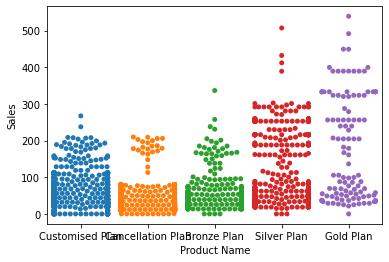

In [33]:
# Plot the Swarm plot

sns.swarmplot(data = Insurance, x='Product Name',y='Sales')

# Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

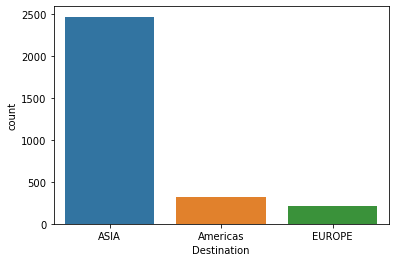

In [34]:
# Plot the Count plot 

sns.countplot(data = Insurance, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

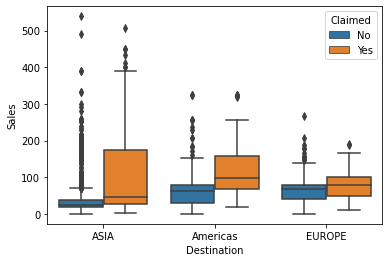

In [35]:
# Box Plot to checking presence of outliers in each feature

sns.boxplot(data = Insurance, x='Destination',y='Sales', hue='Claimed')

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Destination', ylabel='Sales'>

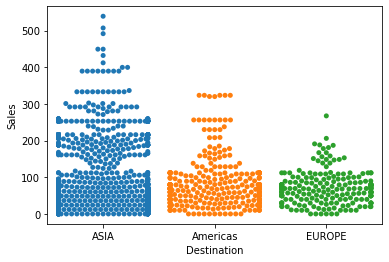

In [36]:
# Plot the Swarm plot

sns.swarmplot(data = Insurance, x='Destination',y='Sales')

# Checking pairwise distribution of the continuous variables

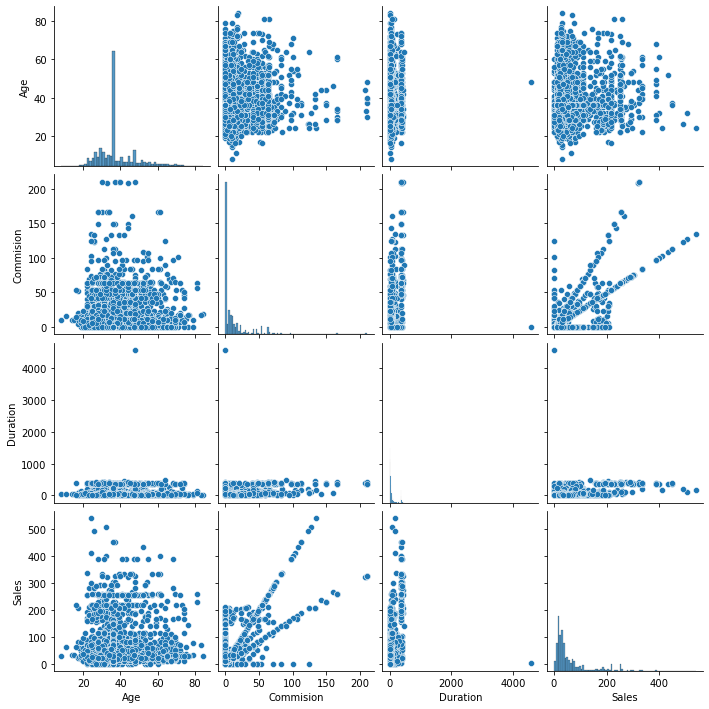

In [37]:
sns.pairplot(Insurance[['Age', 'Commision','Duration', 'Sales']])

# Checking for Correlations

<AxesSubplot:>

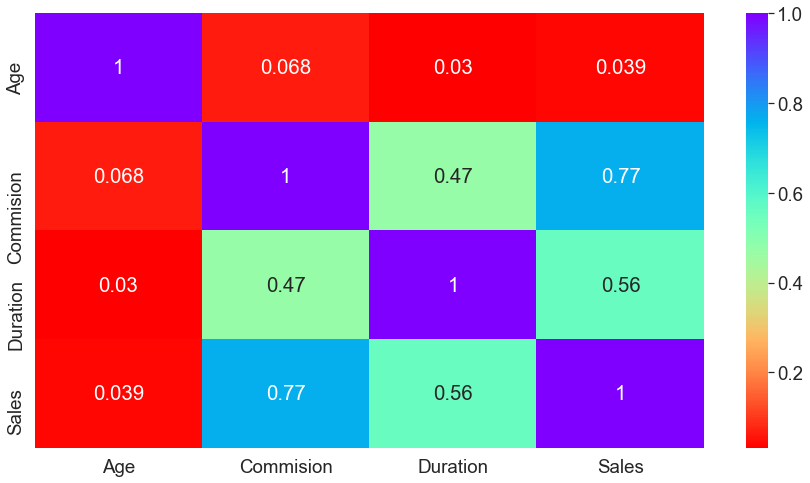

In [38]:
# construct heatmap with only continuous variables
plt.figure(figsize=(15,8))
sns.set(font_scale=1.7)
sns.heatmap(Insurance[['Age', 'Commision','Duration', 'Sales']].corr(), annot=True, cmap="rainbow_r")

Converting all objects to categorical codes

In [39]:
for feature in Insurance.columns: 
    if Insurance[feature].dtype == 'object': 
        Insurance[feature] = pd.Categorical(Insurance[feature]).codes

In [40]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [41]:
Insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [42]:
Insurance.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

Extracting the target column into separate vectors for training set and test set

In [44]:
X = Insurance.drop("Claimed", axis=1)

y = Insurance.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


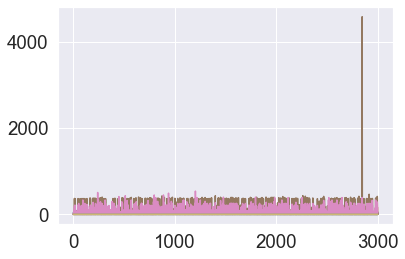

In [45]:
# Before to scaling 
plt.plot(Insurance)
plt.show()

In [46]:
# Using Zscore for scaling/standardisation.

from scipy.stats import zscore
data_Scaled=Insurance.apply(zscore)
data_Scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


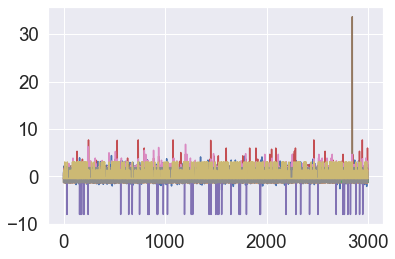

In [47]:
# after to scaling 
plt.plot(data_Scaled)
plt.show()

In [48]:
# Splitting data into training and test set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, train_labels, test_labels = train_test_split(data_Scaled, y, test_size=.30, random_state=5)

# Building a Decision Tree Classifier

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dt = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10)

In [52]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

Generating Tree

In [53]:
from sklearn import tree

train_char_label = ['no', 'yes']
In_Tree_File = open('d:\In_tree.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= In_Tree_File ,feature_names = list(X_train),class_names = list(train_char_label))

In_Tree_File.close()
dot_data

http://www.jdolivet.byethost13.com/Logiciels/WebGraphviz/

Variable Importance

In [55]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"],index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.674494
Sales         0.222345
Product Name  0.092149
Commision     0.008008
Duration      0.003005
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


Predicting on Training and Test dataset

In [56]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

Getting the Predicted Classes and Probs

In [57]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.656751,0.343249
1,0.979452,0.020548
2,0.921171,0.078829
3,0.656751,0.343249
4,0.921171,0.078829


# Building a Random Forest Classifier

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [20,30,40],
    'max_features': [7,8,9],
    'min_samples_leaf': [50,100],
    'min_samples_split': [60,70], 
    'n_estimators': [100,200] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [60]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid_rfcl = grid_search.best_estimator_
best_grid_rfcl

{'max_depth': 20, 'max_features': 9, 'min_samples_leaf': 50, 'min_samples_split': 60, 'n_estimators': 200}


RandomForestClassifier(max_depth=20, max_features=9, min_samples_leaf=50,
                       min_samples_split=60, n_estimators=200, random_state=1)

Predicting the Training and Testing data

In [61]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

Getting the Predicted Classes and Probs

In [62]:
ytest_predict
ytest_predict_prob=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.764425,0.235575
1,0.988304,0.011696
2,0.905682,0.094318
3,0.561293,0.438707
4,0.883504,0.116496


# Building a Neural Network Classifier

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [50,100,200],
    'solver': ['adam'],
    'tol': [0.01], 
    'max_iter': [2500,3000,4000], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [64]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
best_grid_nncl = grid_search.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

Predicting the Training and Testing data

In [65]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

Getting the Predicted Classes and Probs

In [66]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.¶

CART - AUC and ROC for the training data

AUC: 0.812


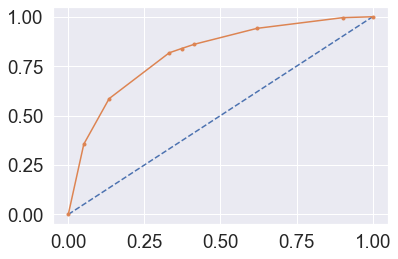

In [68]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
dt_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % dt_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
dt_fpr, dt_tpr, dt_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_fpr, dt_tpr, marker='.')
# show the plot
plt.show()

CART -AUC and ROC for the test data

AUC: 0.800


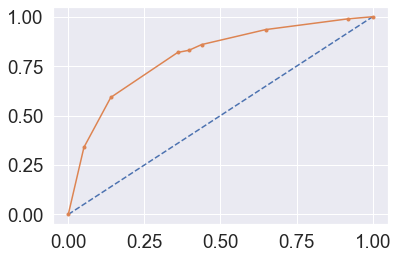

In [69]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cl_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cl_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cl_fpr, cl_tpr, cl_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cl_fpr, cl_tpr, marker='.')
# show the plot
plt.show()

CART Confusion Matrix and Classification Report for the training data

In [70]:
from sklearn.metrics import confusion_matrix,classification_report

In [71]:
confusion_matrix(train_labels, ytrain_predict)

array([[1258,  195],
       [ 268,  379]], dtype=int64)

In [72]:
#Train Data Accuracy

dt_acc=best_grid.score(X_train,train_labels) 
dt_acc

0.7795238095238095

In [73]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1453
           1       0.66      0.59      0.62       647

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.77      0.78      0.78      2100



In [74]:
dt_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
dt_f1=round(df.loc["1"][2],2)
dt_recall=round(df.loc["1"][1],2)
dt_precision=round(df.loc["1"][0],2)
print ('dt_precision ',dt_precision)
print ('dt_recall ',dt_recall)
print ('dt_f1 ',dt_f1)

dt_precision  0.66
dt_recall  0.59
dt_f1  0.62


CART Confusion Matrix and Classification Report for the testing data

In [75]:
confusion_matrix(test_labels, ytest_predict)

array([[536,  87],
       [113, 164]], dtype=int64)

In [76]:
#Test Data Accuracy
cl_acc=best_grid.score(X_test,test_labels)
cl_acc

0.7777777777777778

In [77]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       623
           1       0.65      0.59      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



In [78]:
cl_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cl_metrics).transpose()
cl_precision=round(df.loc["1"][0],2)
cl_recall=round(df.loc["1"][1],2)
cl_f1=round(df.loc["1"][2],2)
print ('cl_precision ',cl_precision)
print ('cl_recall ',cl_recall)
print ('cl_f1 ',cl_f1)

cl_precision  0.65
cl_recall  0.59
cl_f1  0.62


Cart Conclusion

Train Data:

* AUC: 81%

* Accuracy: 78%

* Precision: 66%

* f1-Score: 62%

Test Data:

* AUC: 80%

* Accuracy: 78%

* Precision: 65%

* f1-Score: 62%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is the most important variable for predicting diabetes

RF Model Performance Evaluation on Training data

AUC: 0.841


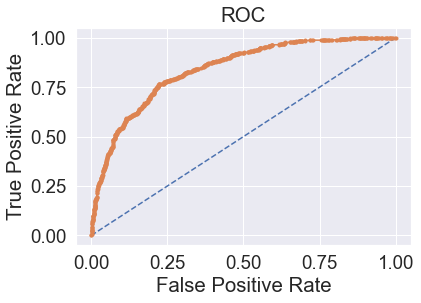

In [79]:
# AUC and ROC for the training data

# calculate AUC
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('AUC: %.3f' % rf_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(rf_fpr, rf_tpr, marker='.')
# show the plot
plt.show()

In [80]:
confusion_matrix(train_labels,ytrain_predict)

array([[1258,  195],
       [ 268,  379]], dtype=int64)

In [81]:
#Train Data Accuracy
rf_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_acc

0.7928571428571428

In [82]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1453
           1       0.70      0.57      0.63       647

    accuracy                           0.79      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.79      0.79      0.79      2100



In [83]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_precision=round(df.loc["1"][0],2)
rf_recall=round(df.loc["1"][1],2)
rf_f1=round(df.loc["1"][2],2)
print ('rf_precision ',rf_precision)
print ('rf_recall ',rf_recall)
print ('rf_f1 ',rf_f1)

rf_precision  0.7
rf_recall  0.57
rf_f1  0.63


RF Model Performance Evaluation on Test data

AUC: 0.813


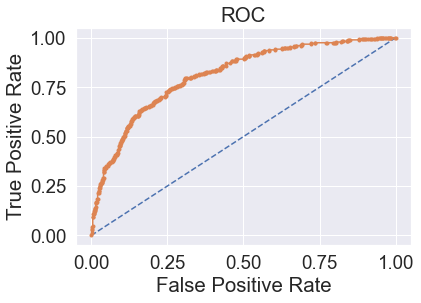

In [84]:
# AUC and ROC for the test data

# calculate AUC
from sklearn.metrics import roc_auc_score
rt_auc = roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('AUC: %.3f' % rt_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rt_fpr, rt_tpr, rt_thresholds = roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(rt_fpr, rt_tpr, marker='.')
# show the plot
plt.show()

In [85]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[548,  75],
       [125, 152]], dtype=int64)

In [86]:
#Test Data Accuracy
rt_acc=best_grid_rfcl.score(X_test,test_labels)
rt_acc

0.7777777777777778

In [87]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       623
           1       0.67      0.55      0.60       277

    accuracy                           0.78       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.77      0.78      0.77       900



In [88]:
rt_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rt_metrics).transpose()
rt_precision=round(df.loc["1"][0],2)
rt_recall=round(df.loc["1"][1],2)
rt_f1=round(df.loc["1"][2],2)
print ('rt_precision ',rt_precision)
print ('rt_recall ',rt_recall)
print ('rt_f1 ',rt_f1)

rt_precision  0.67
rt_recall  0.55
rt_f1  0.6


Random Forest Conclusion

Train Data:

* AUC: 84%
    
* Accuracy: 79%
    
* Precision: 70%
    
* f1-Score: 63%
    
Test Data:

* AUC: 82%
    
* Accuracy: 78%
    
* Precision: 67%
    
* f1-Score: 60%
    
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is again the most important variable for predicting diabetes

NN Model Performance Evaluation on Training data

AUC: 0.817


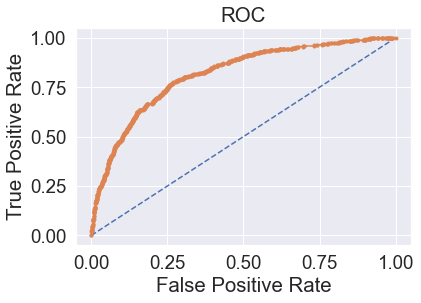

In [89]:
# AUC and ROC for the training data

# calculate AUC
from sklearn.metrics import roc_auc_score
nn_auc = roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('AUC: %.3f' % nn_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_fpr, nn_tpr, nn_thresholds = roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(nn_fpr, nn_tpr, marker='.')
# show the plot
plt.show()

In [90]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1298,  155],
       [ 315,  332]], dtype=int64)

In [91]:
# Train Data Accuracy
nn_acc=best_grid_nncl.score(X_train,train_labels) 
nn_acc

0.7761904761904762

In [92]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [93]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_precision=round(df.loc["1"][0],2)
nn_recall=round(df.loc["1"][1],2)
nn_f1=round(df.loc["1"][2],2)
print ('nn_precision ',nn_precision)
print ('nn_recall ',nn_recall)
print ('nn_f1 ',nn_f1)

nn_precision  0.68
nn_recall  0.51
nn_f1  0.59


NN Model Performance Evaluation on Test data

AUC: 0.804


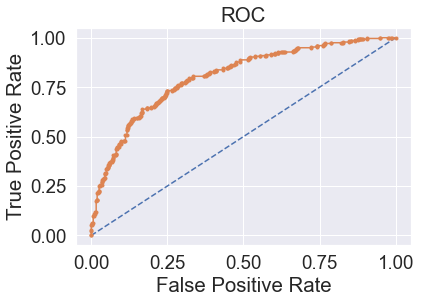

In [94]:
# AUC and ROC for the test data

# calculate AUC
from sklearn.metrics import roc_auc_score
nt_auc = roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('AUC: %.3f' % nt_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nt_fpr, nt_tpr, nt_thresholds = roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(nt_fpr, nt_tpr, marker='.')
# show the plot
plt.show()

In [95]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]], dtype=int64)

In [96]:
#Test Data Accuracy
nt_acc=best_grid_nncl.score(X_test,test_labels)
nt_acc

0.7688888888888888

In [97]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [98]:
nt_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nt_metrics).transpose()
nt_precision=round(df.loc["1"][0],2)
nt_recall=round(df.loc["1"][1],2)
nt_f1=round(df.loc["1"][2],2)
print ('nt_precision ',nt_precision)
print ('nt_recall ',nt_recall)
print ('nt_f1 ',nt_f1)

nt_precision  0.67
nt_recall  0.5
nt_f1  0.57


Neural Network Conclusion

Train Data:

* AUC: 82%
    
* Accuracy: 78%
    
* Precision: 68%
    
* f1-Score: 59
    
Test Data:

* AUC: 80%
    
* Accuracy: 77%
    
* Precision: 67%
    
* f1-Score: 57%
    
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

Comparison of the performance metrics from the 3 models

In [99]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[dt_acc,dt_auc,dt_recall,dt_precision,dt_f1],
        'CART Test':[cl_acc,cl_auc,cl_recall,cl_precision,cl_f1],
       'Random Forest Train':[rf_acc,rf_auc,rf_recall,rf_precision,rf_f1],
        'Random Forest Test':[rt_acc,rt_auc,rt_recall,rt_precision,rt_f1],
       'Neural Network Train':[nn_acc,nn_auc,nn_recall,nn_precision,nn_f1],
        'Neural Network Test':[nt_acc,nt_auc,nt_recall,nt_precision,nt_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.79,0.78,0.78,0.77
AUC,0.81,0.80,0.84,0.81,0.82,0.80
Recall,0.59,0.59,0.57,0.55,0.51,0.50
Precision,0.66,0.65,0.70,0.67,0.68,0.67
F1 Score,0.62,0.62,0.63,0.60,0.59,0.57


ROC Curve for the 3 models on the Training data

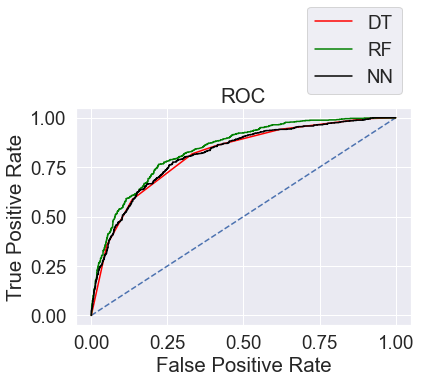

In [100]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_fpr, dt_tpr,color='red',label="DT")
plt.plot(rf_fpr,rf_tpr,color='green',label="RF")
plt.plot(nn_fpr,nn_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC Curve for the 3 models on the Test data

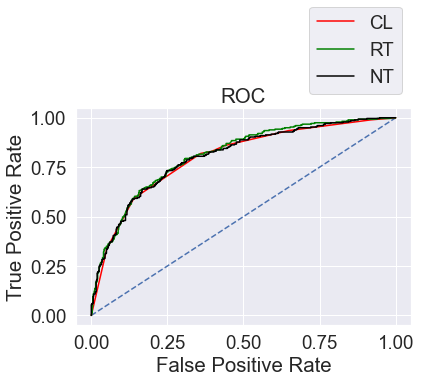

In [101]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cl_fpr, cl_tpr,color='red',label="CL")
plt.plot(rt_fpr,rt_tpr,color='green',label="RT")
plt.plot(nt_fpr,nt_tpr,color='black',label="NT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

CONCLUSION :

I am selecting the RF model, as it has better accuracy, precision, recall, f1 score better than other two CART & NN.

# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

I strongly recommended we collect more real time unstructured data and past data if possible.

This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behaviour patterns, weather information, airline/vehicle types, etc.

• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. • As per the data 90% of insurance is done by online channel. • Other interesting fact, is almost all the offline business has a claimed associated, need to find why? • Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency • Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. • Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?

Key performance indicators (KPI) The KPI’s of insurance claims are: • Reduce claims cycle time • Increase customer satisfaction • Combat fraud • Optimize claims recovery • Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.